<h1 style="text-align:center">Credit-Card-Analysis</h1>

<h3 style="text-align:center">Analyzing eligibility of credit card</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')
df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


## Data Preprocessing

In [4]:
# checking for null values
df.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

There are no null values in the dataset.

In [5]:
# checking the datatypes
df.dtypes

ID                   int64
Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
dtype: object

In [6]:
# checking for number of unique values in each feature
df.nunique()

ID                 9709
Gender                2
Own_car               2
Own_property          2
Work_phone            2
Phone                 2
Email                 2
Unemployed            2
Num_children          9
Num_family           10
Account_length       61
Total_income        263
Age                7172
Years_employed     3637
Income_type           5
Education_type        5
Family_status         5
Housing_type          6
Occupation_type      19
Target                2
dtype: int64

## Data Visualization

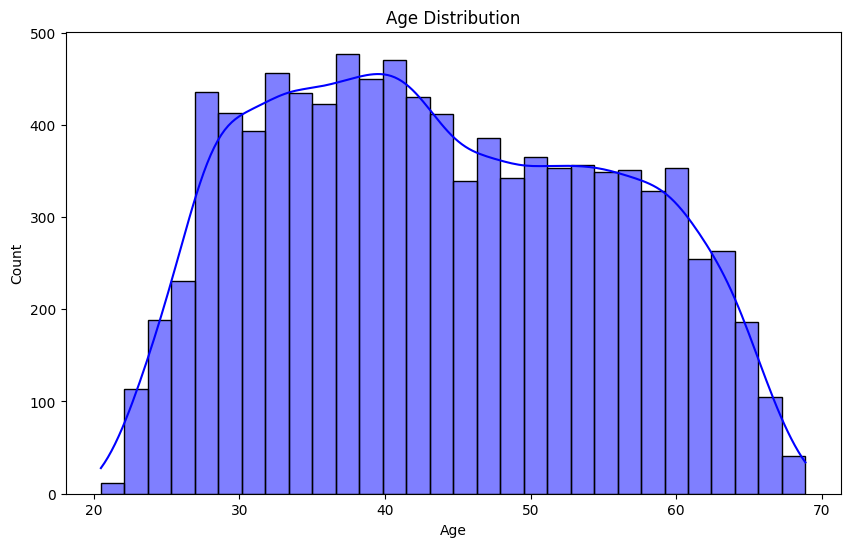

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

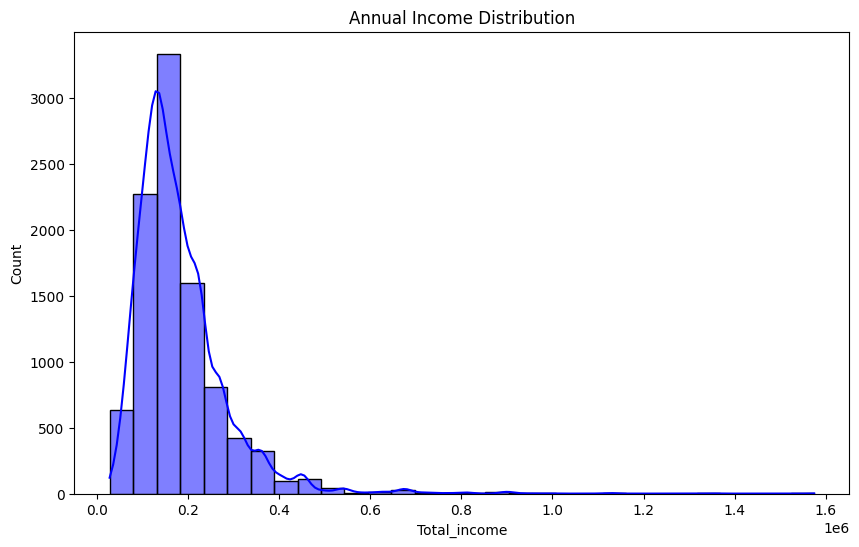

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_income'], bins=30, kde=True, color='blue')
plt.title('Annual Income Distribution')
plt.show()

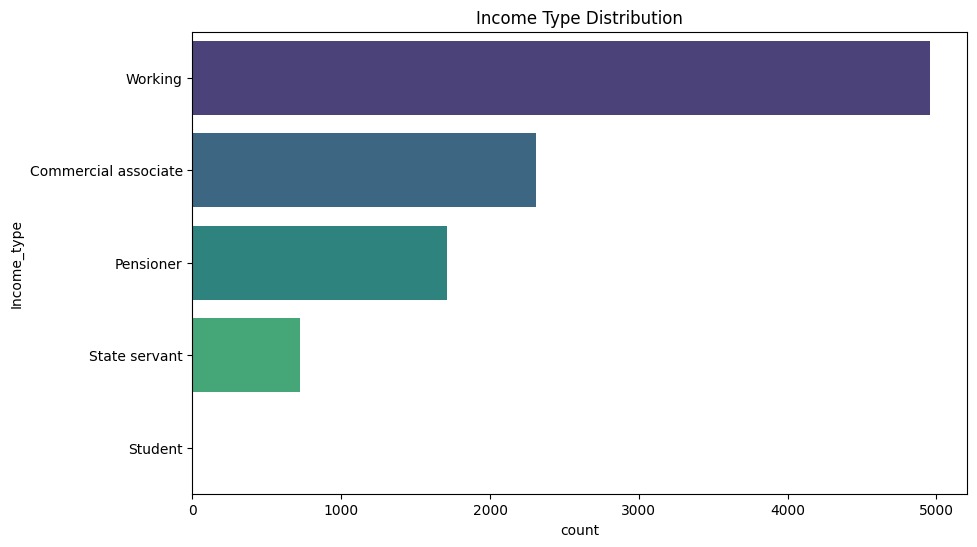

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Income_type'], palette='viridis')
plt.title('Income Type Distribution')
plt.show()

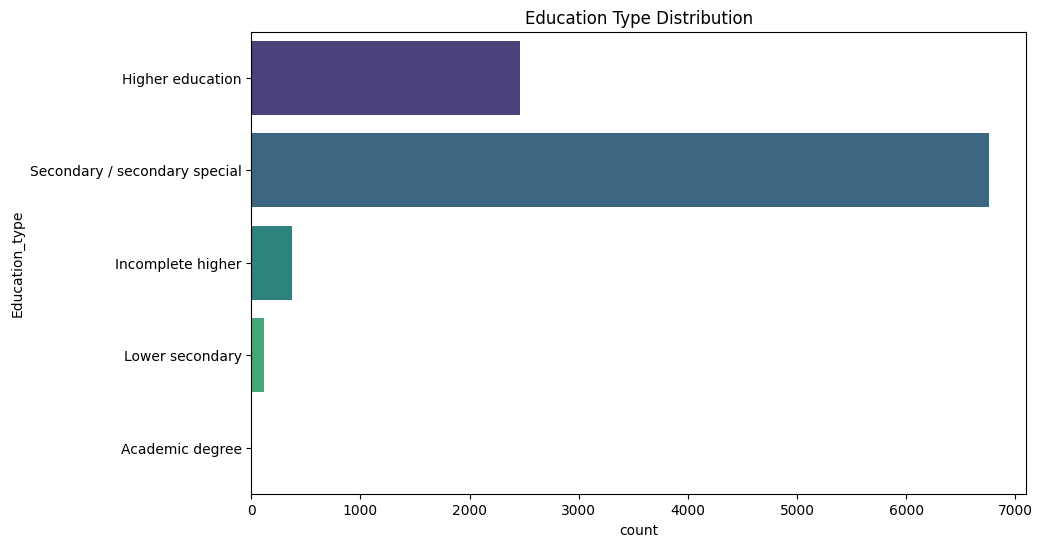

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Education_type'], palette='viridis')
plt.title('Education Type Distribution')
plt.show()

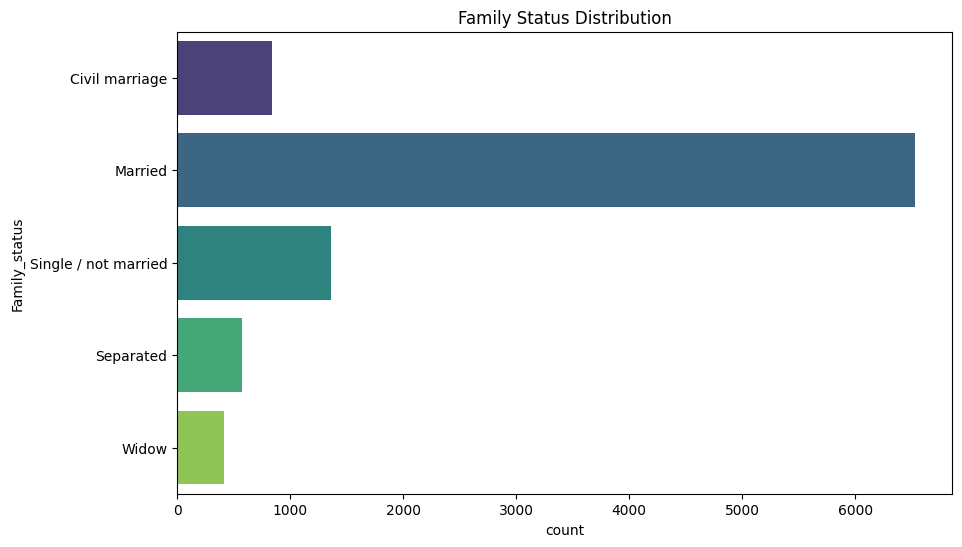

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Family_status'], palette='viridis')
plt.title('Family Status Distribution')
plt.show()

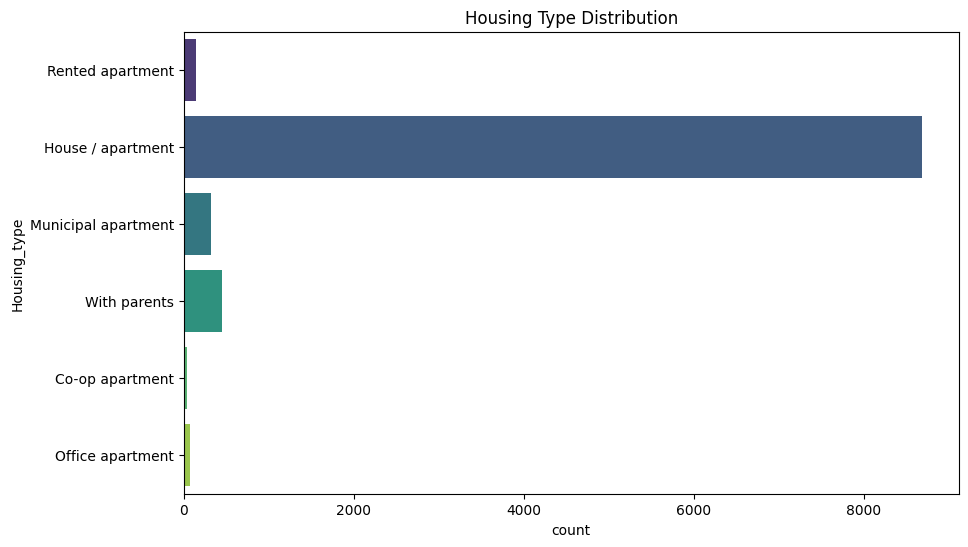

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Housing_type'], palette='viridis')
plt.title('Housing Type Distribution')
plt.show()

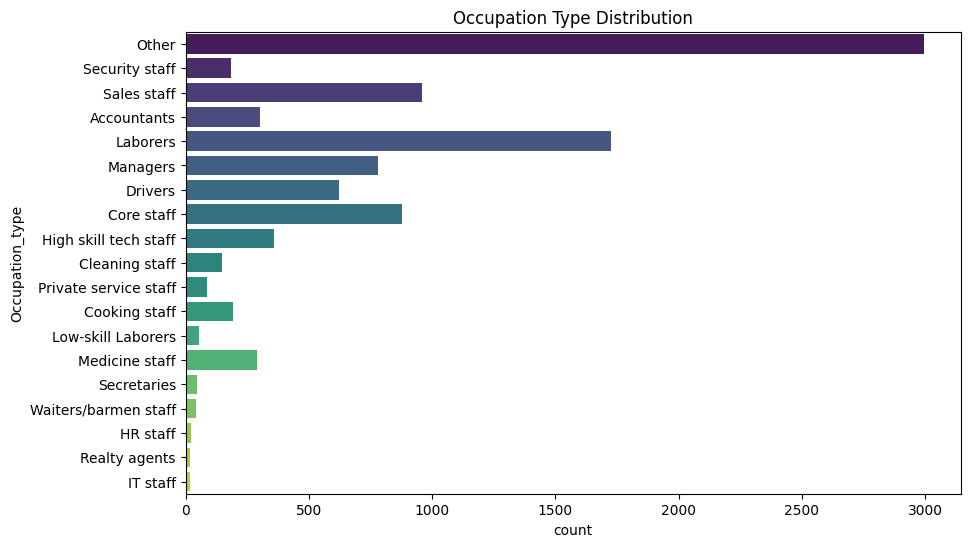

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Occupation_type'], palette='viridis')
plt.title('Occupation Type Distribution')
plt.show()

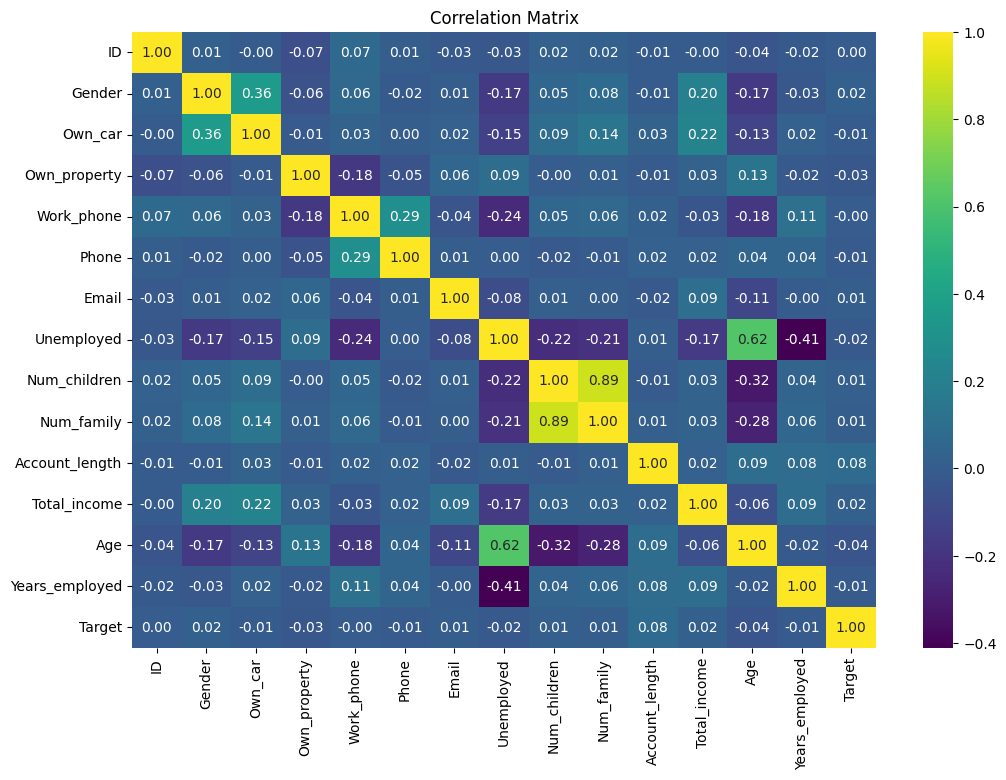

In [14]:
# selecting the numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

correlation_matrix = np.corrcoef(df[numerical_features].values.T)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', xticklabels=numerical_features, yticklabels=numerical_features, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## Model Synthesis

In [15]:
# importing the necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop('Target', axis=1)
y = df['Target']

# encoding the categorical features
label_encoder = LabelEncoder()
x['Income_type'] = label_encoder.fit_transform(x['Income_type'])
x['Education_type'] = label_encoder.fit_transform(x['Education_type'])
x['Family_status'] = label_encoder.fit_transform(x['Family_status'])
x['Housing_type'] = label_encoder.fit_transform(x['Housing_type'])
x['Occupation_type'] = label_encoder.fit_transform(x['Occupation_type'])


# splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# importing all the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

### Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8712501609372988
Test accuracy: 0.8542739443872297


In [21]:
y_pred = lr.predict(x_test)

Confusion Matrix for Logistic Regression:


<Axes: >

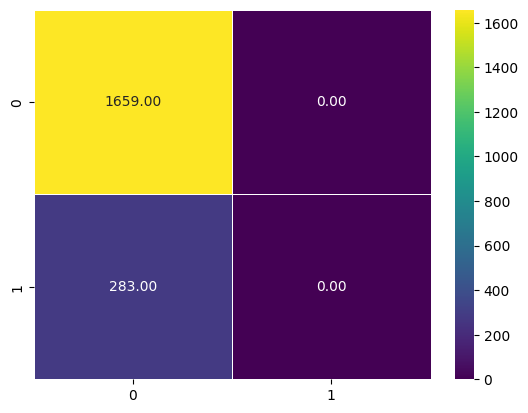

In [22]:
print("Confusion Matrix for Logistic Regression:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [23]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.00      0.00      0.00       283

    accuracy                           0.85      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.73      0.85      0.79      1942



### Support Vector Classifier

In [24]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [25]:
train_accuracy = svc.score(x_train, y_train)
test_accuracy = svc.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8712501609372988
Test accuracy: 0.8542739443872297


In [26]:
y_pred = svc.predict(x_test)

Confusion Matrix for Support Vector Classifier:


<Axes: >

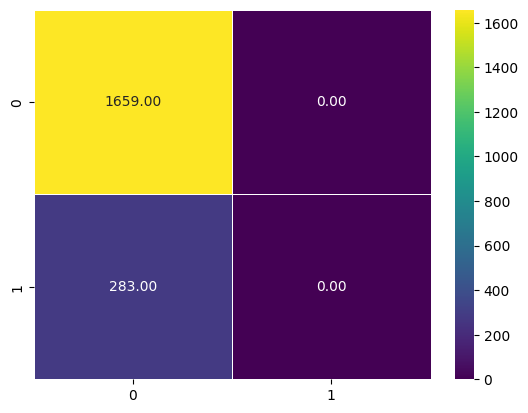

In [27]:
print("Confusion Matrix for Support Vector Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [28]:
print("Classification Report for Support Vector Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.00      0.00      0.00       283

    accuracy                           0.85      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.73      0.85      0.79      1942



### Decision Tree Classifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
train_accuracy = dt.score(x_train, y_train)
test_accuracy = dt.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.7481977342945417


In [31]:
y_pred = dt.predict(x_test)

Confusion Matrix for Decision Tree Classifier:


<Axes: >

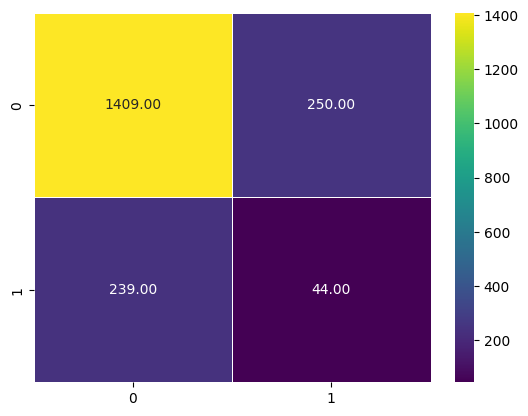

In [32]:
print("Confusion Matrix for Decision Tree Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [33]:
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1659
           1       0.15      0.16      0.15       283

    accuracy                           0.75      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       0.75      0.75      0.75      1942



### Random Forest Classifier

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
train_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.854788877445932


In [36]:
y_pred = rf.predict(x_test)

Confusion Matrix for Random Forest Classifier:


<Axes: >

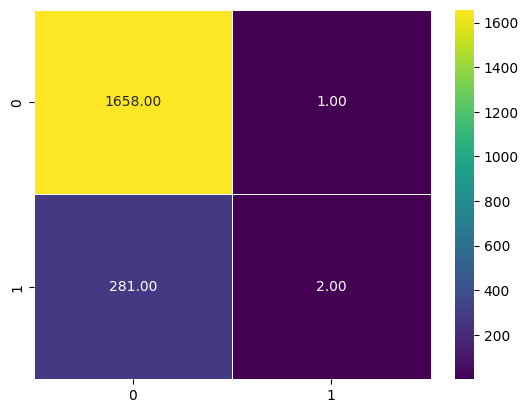

In [37]:
print("Confusion Matrix for Random Forest Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [38]:
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1659
           1       0.67      0.01      0.01       283

    accuracy                           0.85      1942
   macro avg       0.76      0.50      0.47      1942
weighted avg       0.83      0.85      0.79      1942



### K Neighbors Classifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
train_accuracy = knn.score(x_train, y_train)
test_accuracy = knn.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.878073902407622
Test accuracy: 0.840885684860968


In [41]:
y_pred = knn.predict(x_test)

Confusion Matrix for K Nearest Neighbors Classifier:


<Axes: >

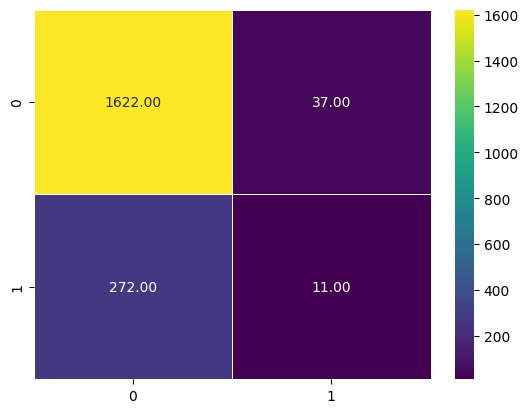

In [42]:
print("Confusion Matrix for K Nearest Neighbors Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [43]:
print("Classification Report for K Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for K Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1659
           1       0.23      0.04      0.07       283

    accuracy                           0.84      1942
   macro avg       0.54      0.51      0.49      1942
weighted avg       0.76      0.84      0.79      1942



### Gaussian Naive Bayes

In [44]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

In [45]:
train_accuracy = gaussian.score(x_train, y_train)
test_accuracy = gaussian.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8639114201107249
Test accuracy: 0.8439752832131823


In [46]:
y_pred = gaussian.predict(x_test)

Confusion Matrix for Gaussian Naive Bayes Classifier:


<Axes: >

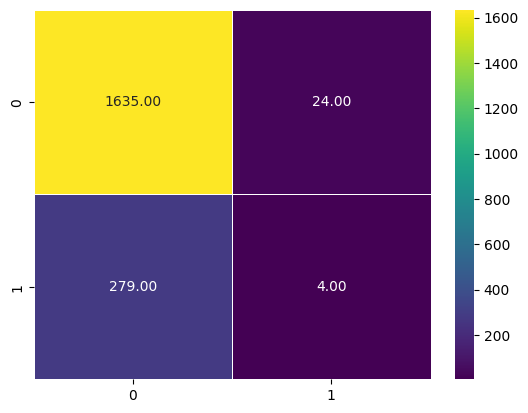

In [47]:
print("Confusion Matrix for Gaussian Naive Bayes Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [48]:
print("Classification Report for Gaussian Naive Bayes Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1659
           1       0.14      0.01      0.03       283

    accuracy                           0.84      1942
   macro avg       0.50      0.50      0.47      1942
weighted avg       0.75      0.84      0.79      1942



### Gradient Boosting Classifier

In [49]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [50]:
train_accuracy = gb.score(x_train, y_train)
test_accuracy = gb.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8739539075576156
Test accuracy: 0.854788877445932


In [51]:
y_pred = gb.predict(x_test)

Confusion Matrix for Gradient Boosting Classifier:


<Axes: >

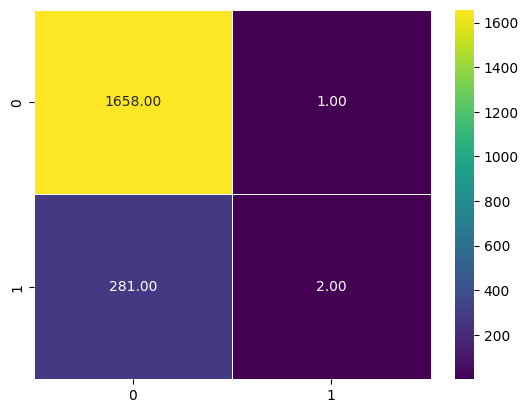

In [52]:
print("Confusion Matrix for Gradient Boosting Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [53]:
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1659
           1       0.67      0.01      0.01       283

    accuracy                           0.85      1942
   macro avg       0.76      0.50      0.47      1942
weighted avg       0.83      0.85      0.79      1942



### AdaBoost Classifier

In [54]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [55]:
train_accuracy = adaboost.score(x_train, y_train)
test_accuracy = adaboost.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8724089094888632
Test accuracy: 0.8527291452111225


In [56]:
y_pred = adaboost.predict(x_test)

Confusion Matrix for AdaBoost Classifier:


<Axes: >

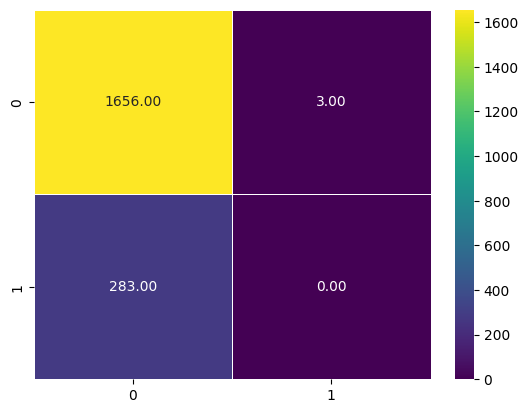

In [57]:
print("Confusion Matrix for AdaBoost Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [58]:
print("Classification Report for AdaBoost Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.00      0.00      0.00       283

    accuracy                           0.85      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.73      0.85      0.79      1942



### XGBoost Classifier

In [59]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9455388180764774
Test accuracy: 0.8480947476828012


In [61]:
y_test = xgb.predict(x_test)

Confusion Matrix for XGBoost Classifier:


<Axes: >

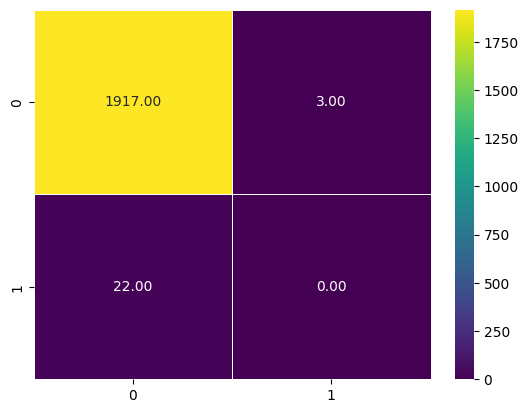

In [62]:
print("Confusion Matrix for XGBoost Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [63]:
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1920
           1       0.00      0.00      0.00        22

    accuracy                           0.99      1942
   macro avg       0.49      0.50      0.50      1942
weighted avg       0.98      0.99      0.98      1942



### LightGBM Classifier

In [64]:
lightgbm = LGBMClassifier()
lightgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 1000, number of negative: 6767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 7767, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128750 -> initscore=-1.912058
[LightGBM] [Info] Start training from score -1.912058


LGBMClassifier()

In [65]:
train_accuracy = lightgbm.score(x_train, y_train)
test_accuracy = lightgbm.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8890176387279516
Test accuracy: 0.9886714727085479


In [66]:
y_pred = lightgbm.predict(x_test)

Confusion Matrix for LightGBM Classifier:


<Axes: >

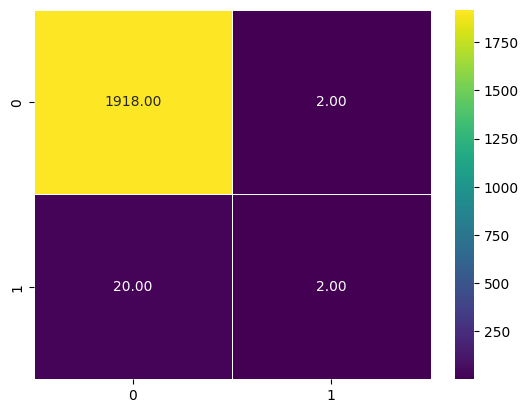

In [67]:
print("Confusion Matrix for LightGBM Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [68]:
print("Classification Report for LightGBM Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1920
           1       0.50      0.09      0.15        22

    accuracy                           0.99      1942
   macro avg       0.74      0.54      0.57      1942
weighted avg       0.98      0.99      0.98      1942



### CatBoost Classifier

In [69]:
catboost = CatBoostClassifier(verbose=0)
catboost.fit(x_train, y_train)

In [70]:
train_accuracy = catboost.score(x_train, y_train)
test_accuracy = catboost.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8861851422685721
Test accuracy: 0.9876416065911432


In [71]:
y_pred = catboost.predict(x_test)

Confusion Matrix for CatBoost Classifier:


<Axes: >

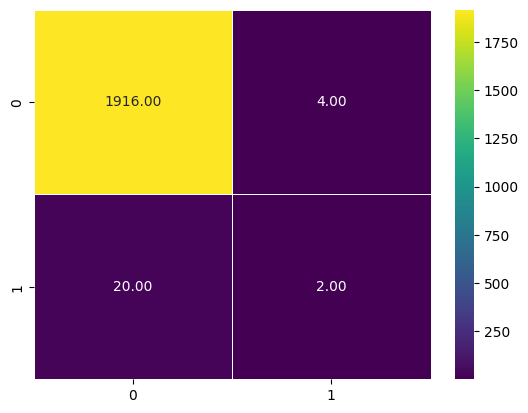

In [72]:
print("Confusion Matrix for CatBoost Classifier:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [73]:
print("Classification Report for CatBoost Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1920
           1       0.33      0.09      0.14        22

    accuracy                           0.99      1942
   macro avg       0.66      0.54      0.57      1942
weighted avg       0.98      0.99      0.98      1942



In [ ]:
# plotting roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score